In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
    

In [ ]:
folders = glob('drive/MyDrive/IE/train/*')
folders

['drive/MyDrive/IE/train/PNEUMONIA', 'drive/MyDrive/IE/train/NORMAL']

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
plot(model)

NameError: ignored

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#target size to be same as batch size
training_set = train_datagen.flow_from_directory('drive/MyDrive/IE/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 2465 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/IE/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
78/78 [==============================] - 1449s 19s/step - loss: 0.1878 - accuracy: 0.9623 - val_loss: 1.0793 - val_accuracy: 0.7340
Epoch 2/2
78/78 [==============================] - 1422s 18s/step - loss: 0.0233 - accuracy: 0.9911 - val_loss: 0.9163 - val_accuracy: 0.7644


In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5')

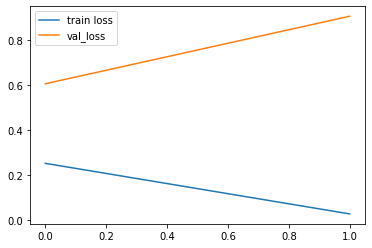

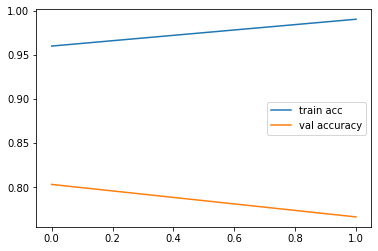

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5')

In [ ]:
from keras.models import load_model

In [ ]:
from keras.preprocessing import image

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np

In [ ]:
model=load_model('chest_xray.h5')

In [ ]:
img=image.load_img('drive/MyDrive/IE/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',target_size=(224,224))

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model('model_vgg16.h5')
img=image.load_img('drive/MyDrive/IE/val/PNEUMONIA/person1946_bacteria_4874.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
classes

array([[0., 1.]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#array([[9.9999976e-01, 1.8367538e-07]], dtype=float32)

In [ ]:
#array([[0., 1.]], dtype=float32)
sum(classes)

array([5.0994143e-11, 1.0000000e+00], dtype=float32)

In [ ]:
a=[1.000000e+00, 5.958899e-22]
p=sum(a)
print(p)
if p==1:
  print("person is affected by pneumonia")
else:
  print("not affected by pneumonia")

1.0
person is affected by pneumonia


In [ ]:
a=input()
b=len(a)
c=list(a)
vowels=0
for i in range(0,b):
  print(c[i])
  if c[i]=="h":
    vowels=vowels+1
    print(vowels)



helloh
h
1
e
l
l
o
h
2


In [ ]:
a=input()
b=len(a)
c=list(a)
vowels="a"or"e"or"i"or"o"or"u"
count=0
if c[3]<=vowels:
  print("YES")
elif c[3]>=vowels:
  print("NO")

    


apple
NO
